In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df_1 = pickle.load(open('df1.pkl','rb'))
data1 = pd.DataFrame(df_1)

In [3]:
data1

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
...,...,...,...,...,...,...
10292,other,1200.0,2.0,3.0,70.0,2
10293,other,1800.0,1.0,1.0,200.0,1
10296,other,1353.0,2.0,2.0,110.0,2
10297,other,812.0,1.0,0.0,26.0,1


In [4]:
data1['price_per_sqft']=data1['price']*100000/data1['total_sqft']

In [5]:
data1

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,1200.0,2.0,3.0,70.0,2,5833.333333
10293,other,1800.0,1.0,1.0,200.0,1,11111.111111
10296,other,1353.0,2.0,2.0,110.0,2,8130.081301
10297,other,812.0,1.0,0.0,26.0,1,3201.970443


In [6]:
top_10_locations_high = data1.groupby('location')['price_per_sqft'].mean().nlargest(10)


In [7]:
top_10_locations_high

location
HAL 2nd Stage           21832.304324
Cunningham Road         20023.944912
Giri Nagar              16146.825397
2nd Stage Nagarbhavi    15891.203704
Rajaji Nagar            14938.766577
Benson Town             13532.753047
1st Block Jayanagar     13186.920952
Indira Nagar            12565.528882
Malleshwaram            12298.609985
Sarakki Nagar           11677.772649
Name: price_per_sqft, dtype: float64

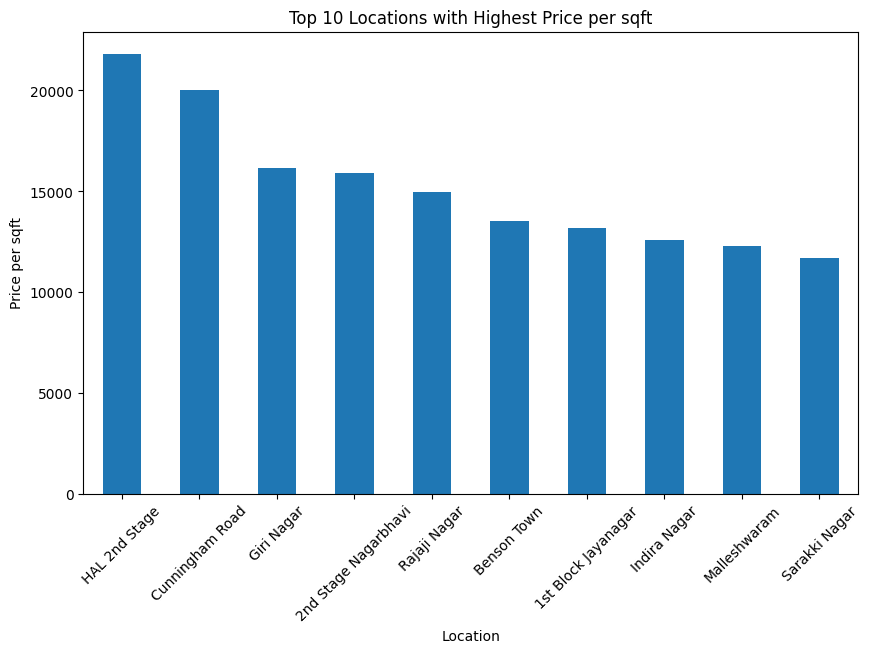

In [8]:
plt.figure(figsize=(10, 6))
top_10_locations_high.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Price per sqft')
plt.title('Top 10 Locations with Highest Price per sqft')
plt.xticks(rotation=45)
plt.show()

In [9]:
top_10_locations_low = data1.groupby('location')['price_per_sqft'].mean().nsmallest(10)
top_10_locations_low

location
Chandapura                     2847.086119
Bommasandra Industrial Area    2888.002358
Ananth Nagar                   3014.030424
Kereguddadahalli               3298.326699
Attibele                       3299.719907
Sarjapura - Attibele Road      3344.057853
Kammasandra                    3346.769120
Dommasandra                    3351.969514
Vasanthapura                   3558.487768
Hoskote                        3590.997697
Name: price_per_sqft, dtype: float64

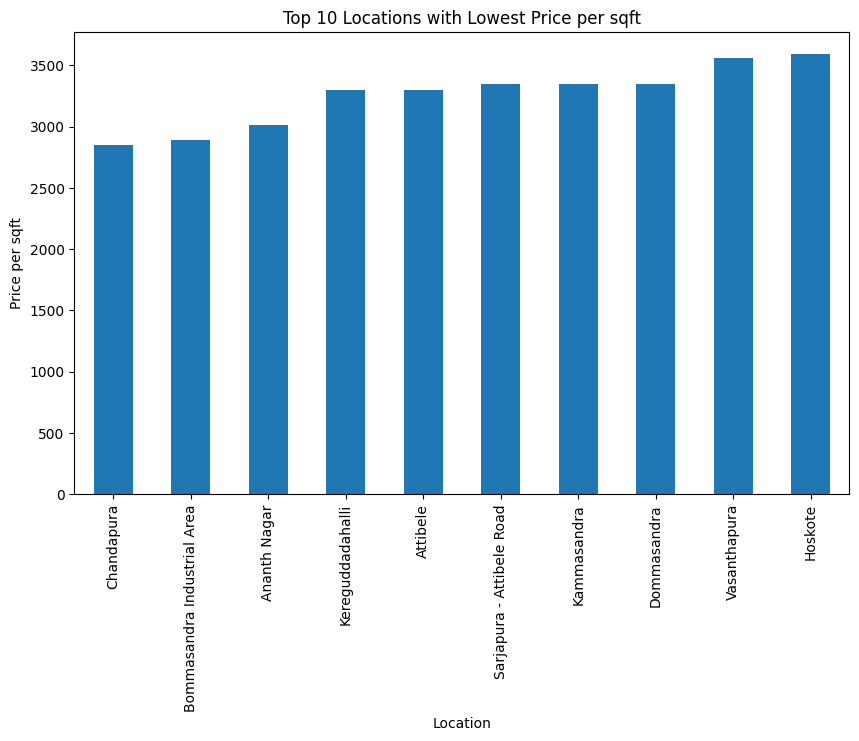

In [10]:
plt.figure(figsize=(10, 6))
top_10_locations_low.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Price per sqft')
plt.title('Top 10 Locations with Lowest Price per sqft')
plt.show()

In [11]:
data1[['location','price_per_sqft']].value_counts().sort_values(ascending=False)

location      price_per_sqft
other         6666.666667       22
              10000.000000      20
Haralur Road  3700.724055       18
other         6000.000000       16
Uttarahalli   4000.000000       14
                                ..
other         8300.000000        1
              8314.855876        1
              8403.361345        1
              8407.871199        1
              13838.475499       1
Name: count, Length: 6244, dtype: int64

In [12]:
data1[['location','price']].value_counts().sort_values(ascending=False)

location      price 
other         90.0      38
              75.0      37
              110.0     37
              70.0      32
              95.0      30
                        ..
Rajaji Nagar  550.0      1
              558.0      1
              598.0      1
Rajiv Nagar   80.0       1
other         2100.0     1
Name: count, Length: 4824, dtype: int64

In [13]:
top_11_locations = data1['location'].value_counts().nlargest(11)
top_10_locations = top_11_locations.drop('other')
top_10_locations

location
Whitefield               245
Sarjapur  Road           190
Electronic City          162
Raja Rajeshwari Nagar    140
Uttarahalli              120
Haralur Road             117
Marathahalli             116
Bannerghatta Road        109
Hennur Road              109
Thanisandra              107
Name: count, dtype: int64

In [14]:
top_11_locations

location
other                    1136
Whitefield                245
Sarjapur  Road            190
Electronic City           162
Raja Rajeshwari Nagar     140
Uttarahalli               120
Haralur Road              117
Marathahalli              116
Bannerghatta Road         109
Hennur Road               109
Thanisandra               107
Name: count, dtype: int64

In [15]:
type(top_11_locations)

pandas.core.series.Series

In [16]:
top_10_data = data1[data1['location'].isin(top_10_locations.index)]

In [17]:
top_10_data.shape

(1415, 7)

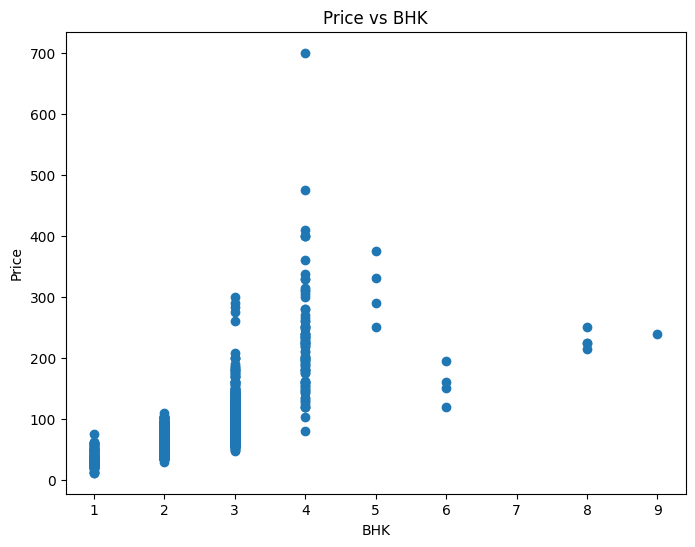

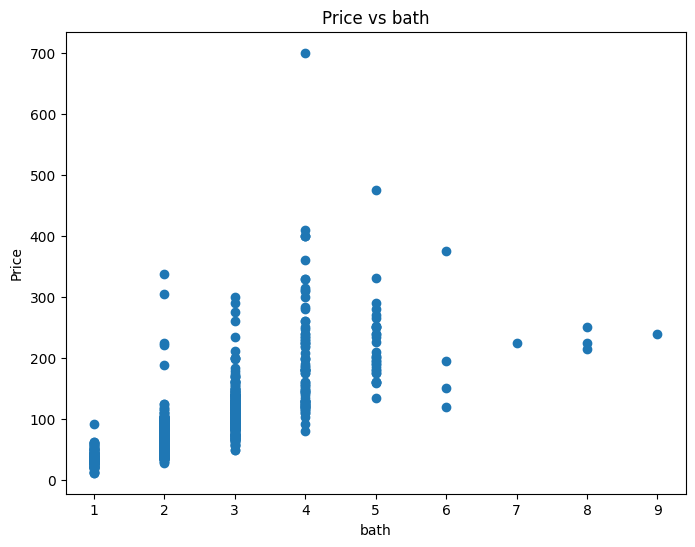

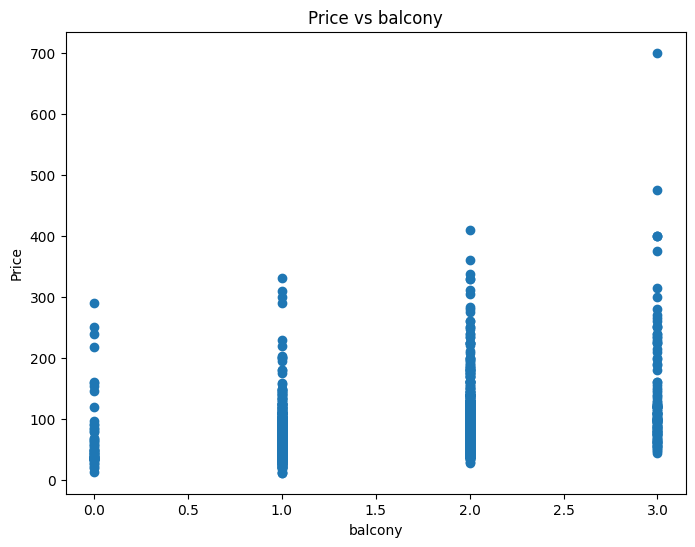

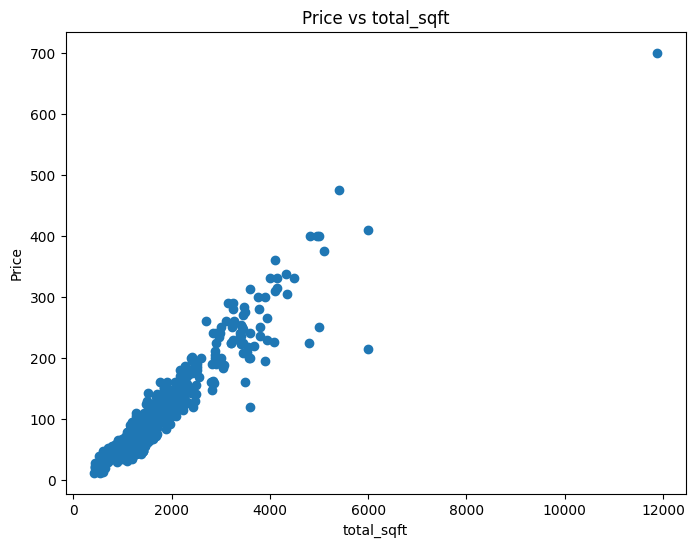

In [18]:
features = ['BHK', 'bath', 'balcony', 'total_sqft']

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(top_10_data[feature], top_10_data['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')
    plt.show()

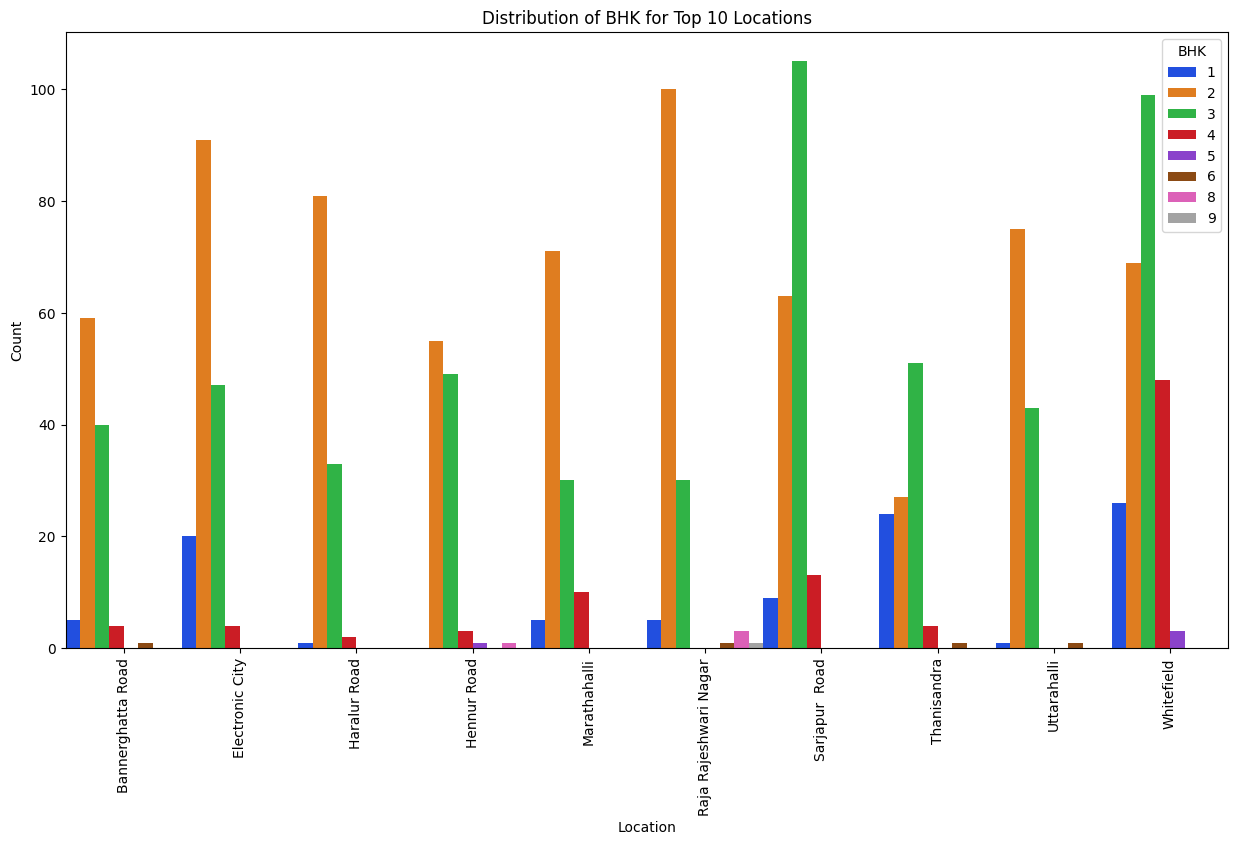

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(data=top_10_data, x='location', hue='BHK',palette='bright',width=1)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of BHK for Top 10 Locations')
plt.xticks(rotation=90)
plt.legend(title='BHK')
plt.show()

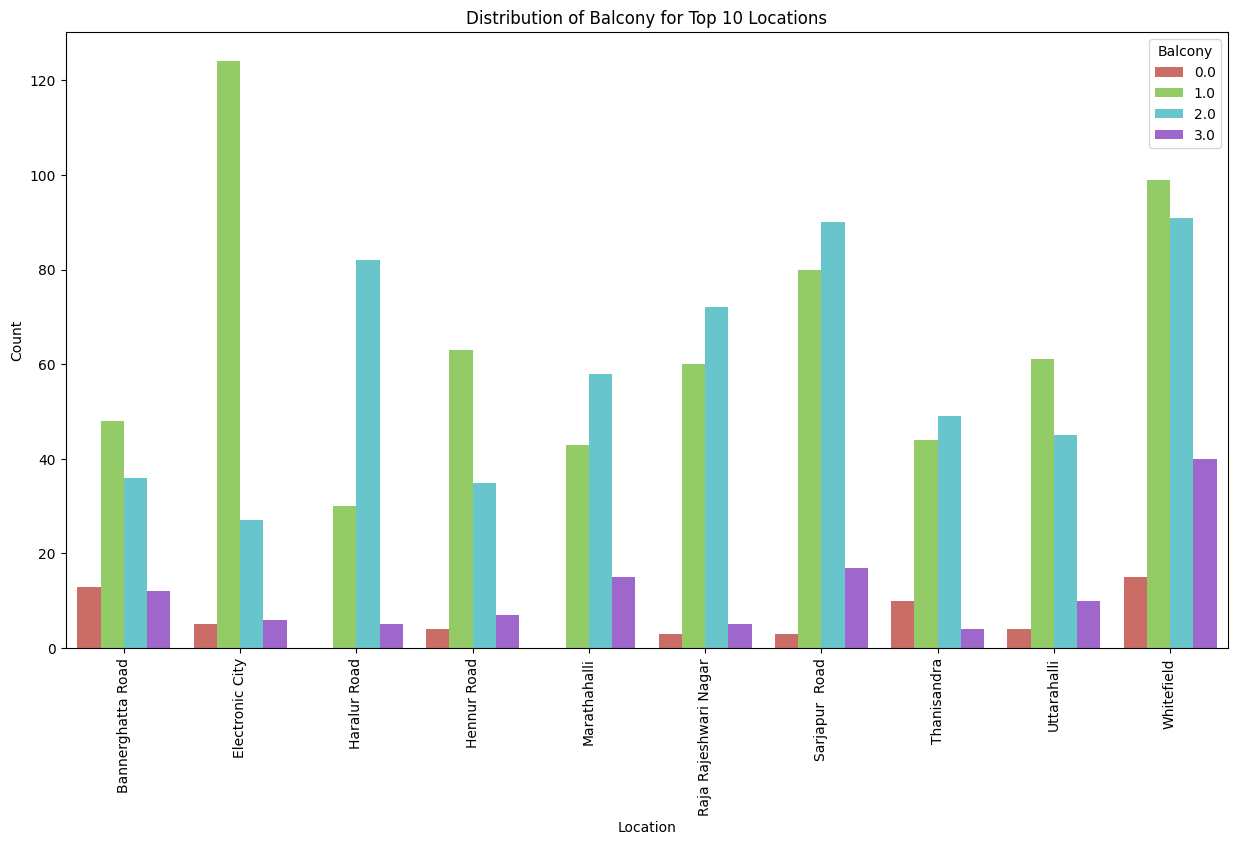

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(data=top_10_data, x='location', hue='balcony',palette='hls')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Balcony for Top 10 Locations')
plt.xticks(rotation=90)
plt.legend(title='Balcony')
plt.show()

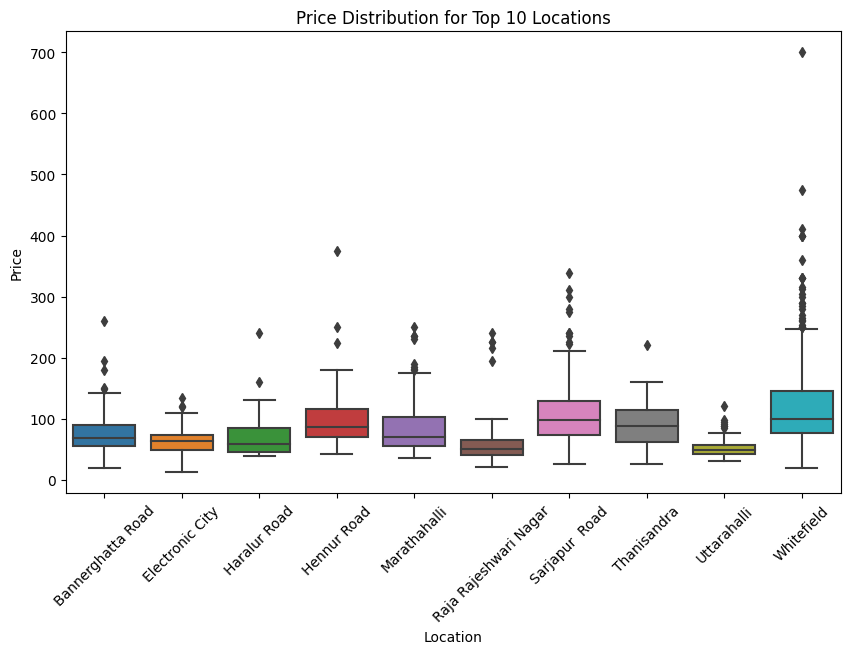

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_10_data, x='location', y='price')
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Price Distribution for Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='balcony', ylabel='count'>

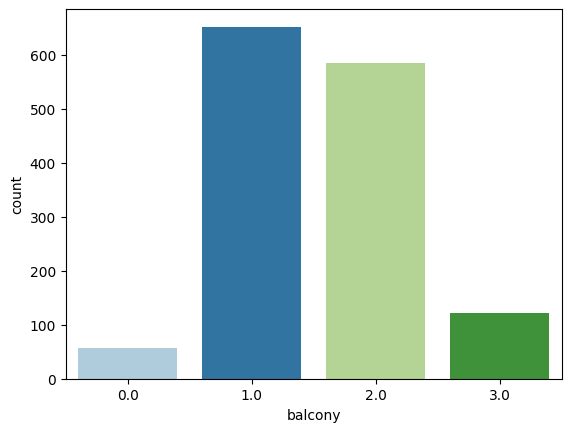

In [22]:
sns.countplot(top_10_data,x='balcony',palette='Paired')


<Axes: xlabel='bath', ylabel='count'>

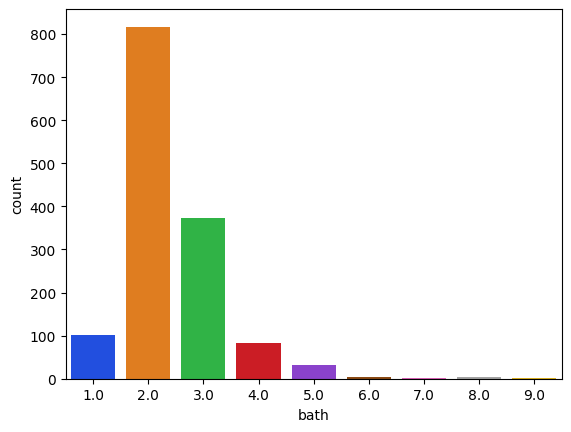

In [23]:
sns.countplot(top_10_data,x='bath',palette='bright')

<Axes: xlabel='BHK', ylabel='count'>

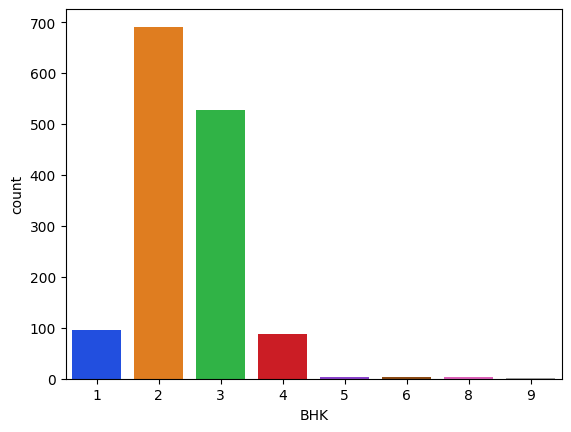

In [24]:
sns.countplot(top_10_data,x='BHK',palette='bright')

In [33]:

# Calculate the average price for each location
average_prices = top_10_data.groupby('location')['price'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_prices, x='location', y='price',hue='BHK')
plt.xlabel('Location')
plt.ylabel('Average Price (in Lakhs)')
plt.title('Average Price for Top 10 Locations')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'BHK'

<Figure size 1000x600 with 0 Axes>

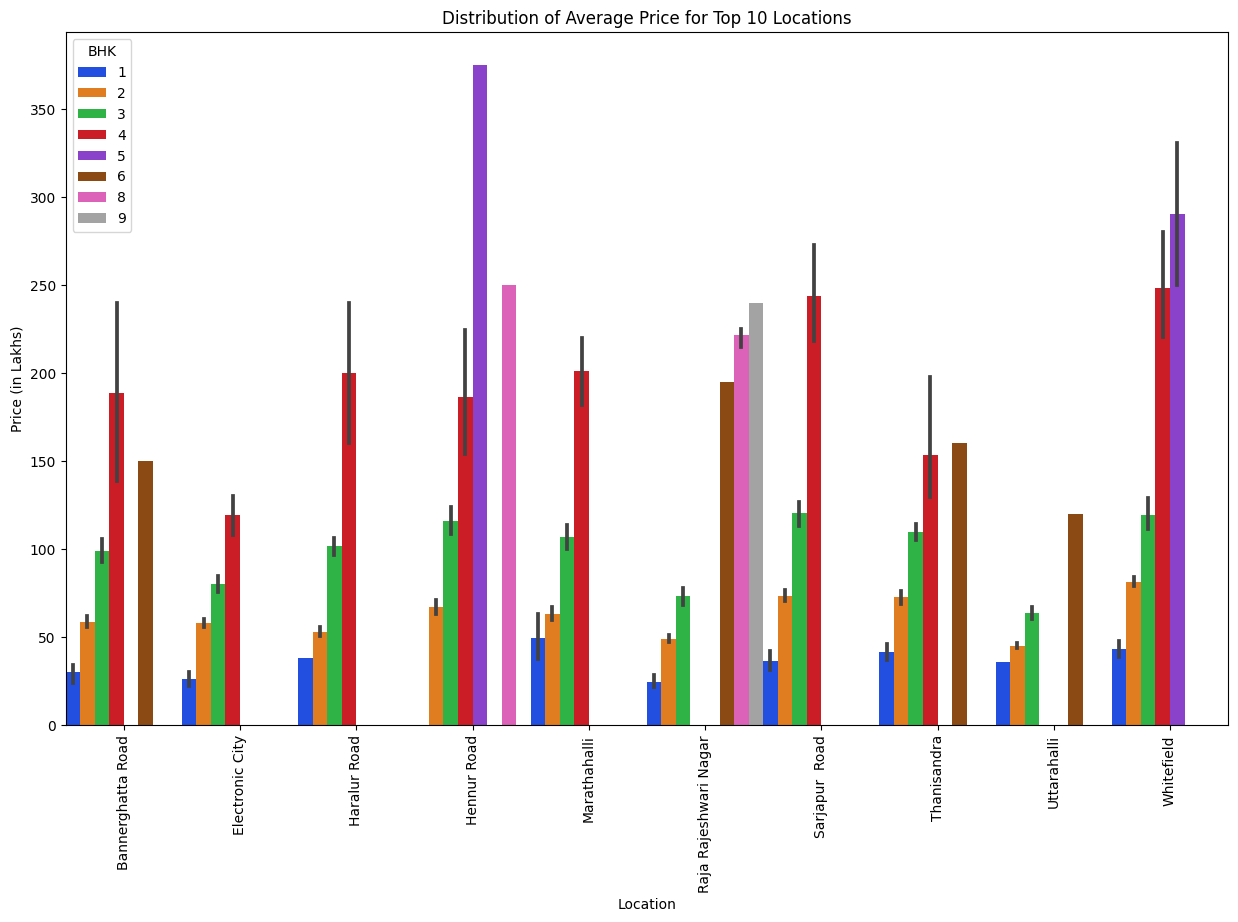

In [32]:
plt.figure(figsize=(15,9))
sns.barplot(data=top_10_data, x='location', y='price',hue='BHK', palette='bright', width=1)
plt.xlabel('Location')
plt.ylabel('Price (in Lakhs)')
plt.title('Distribution of Average Price for Top 10 Locations')
plt.xticks(rotation=90)
plt.show()